In [15]:
import json
import numpy
import pandas as pd
import numpy as np

# climate数据集处理
## step1:筛选出true/false数据集
##### 907条：654条true 253条false

In [9]:
with open('climate_dataset.jsonl') as file:
    x=0
    for line in file:
        data = json.loads(line)
        if data['claim_label'] == 'DISPUTED':
            x+=1
    print(x)

154


In [ ]:
with open('climate_true_or_false.json','w') as f:
    with open('climate_dataset.jsonl') as file:
        for line in file:
            data = json.loads(line)
            if data['claim_label'] == 'SUPPORTS' or data['claim_label'] == 'REFUTES':
                f.write(json.dumps(data)+"\n")

In [120]:
t=0
f=0
with open('climate_true_or_false.json') as file:
     for line in file:
        data = json.loads(line)
        if data['claim_label'] == 'SUPPORTS':
            t+=1
        elif data['claim_label'] == 'REFUTES':
            f+=1
print(t,f)

654 253


## step2:generate reference
prompyt：Given one claim whose authenticity is unknown, you should provide one reference about it and summarize the reference in a paragraph.

references.json
## step3:given reference and claim，fack-check

## step4:generate hallucination datasets

In [121]:
t=0
f=0
hallu=0
no_ref=0
hallu0,hallu1=0,0
with open('hallucination.json', 'w') as outfile:
    with open('cls.jsonl') as file:
        for line in file:
            data = json.loads(line)
            answer = data[1]['choices'][0]['message']['content']
            question = data[0]['messages'][0]['content']
            claim = data[0]['messages'][0]['content'].split('Claim:')[1].split('Reference:')[0]
            reference = data[0]['messages'][0]['content'].split('Reference:')
            if len(reference)==1:
                reference = reference[0]
            elif len(reference)==2:
                reference = reference[1]
            else:
                reference = reference[2]
            if "true" in answer or "True" in answer:
                t+=1
                with open('climate_true_or_false.json') as file1:  
                    for line1 in file1:
                        data1 = json.loads(line1)
                        claim1 = data1['claim']
                        if claim.strip() == claim1:
                            if data1['claim_label'] == 'REFUTES':
                                hallu+=1
                                hallu0+=1
                                outfile.write(json.dumps(data)+"\n")
            elif "False" in answer or "false" in answer:
                f+=1
                with open('climate_true_or_false.json') as file1:  
                    for line1 in file1:
                        data1 = json.loads(line1)
                        claim1 = data1['claim']
                        if claim.strip() == claim1:
                            if data1['claim_label'] == 'SUPPORTS':
                                outfile.write(json.dumps(data)+"\n")
                                hallu+=1
                                hallu1+=1
            else:
                no_ref+=1
                print(no_ref)
                print(claim)
                print(reference)
                print(answer)
print('\n',t,f,hallu)
print(hallu0,hallu1)

1
 by that I mean the central Arctic will be ice-free. 
 National Snow and Ice Data Center (NSIDC). (2021). Arctic Sea Ice News and Analysis. Retrieved from https://nsidc.org/arcticseaicenews/

Summary: The National Snow and Ice Data Center (NSIDC) provides regular updates and analysis on the state of Arctic sea ice. According to their observations, the Arctic sea ice has been declining over the past few decades, with a significant decrease in both extent and thickness. While the NSIDC does not explicitly state that the central Arctic will be completely ice-free, their data indicates a concerning trend of diminishing ice cover. The NSIDC's reports highlight the importance of monitoring and understanding these changes to assess the potential impacts on the Arctic ecosystem and global climate patterns.
The claim is not explicitly mentioned in the reference.
2
 Cosmic ray counts have increased over the past 50 years, so if they do influence global temperatures, they are having a cooling e

## step5:multi-reference

In [24]:
x=0
y1=[]
with open('detections_11.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: ')[1].split('P2: ')[0]
        if "here are no conflicting parts" in answer:
            x+=1
        else:
            y1.append(p1)
print(x,183,(183-x)/183)

157 183 0.14207650273224043


In [23]:
x=0
y2=[]
with open('detections_12.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: ')[1].split('P2: ')[0]
        if "here are no conflicting parts" in answer:
            x+=1
        else:
            y2.append(p1)
print(183-x,(183-x)/183)

40 0.2185792349726776


In [22]:
x=0
y3=[]
with open('detections_13.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: ')[1].split('P2: ')[0]
        if "here are no conflicting parts" in answer:
            x+=1
        else:
            y3.append(p1)
print(183-x,(183-x)/183)

37 0.20218579234972678


In [21]:
x=0
y4=[]
with open('detections_14.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: ')[1].split('P2: ')[0]
        if "here are no conflicting parts" in answer:
            x+=1
        else:
            y4.append(p1)
print(183-x,(183-x)/183)

46 0.25136612021857924


In [25]:
x=0
y5=[]
with open('detections_15.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: ')[1].split('P2: ')[0]
        if "here are no conflicting parts" in answer:
            x+=1
        else:
            y5.append(p1)
print(183-x,(183-x)/183)

36 0.19672131147540983


In [27]:
x=0
y6=[]
with open('detections_16.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: ')[1].split('P2: ')[0]
        if "here are no conflicting parts" in answer:
            x+=1
        else:
            y6.append(p1)
print(183-x,(183-x)/183)

35 0.1912568306010929


In [45]:
x=0
y7=[]
with open('detections_17.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: ')[1].split('P2: ')[0]
        if "here are no conflicting parts" in answer:
            x+=1
        else:
            y7.append(p1)
print(183-x,(183-x)/183)

17 0.09289617486338798


In [57]:
x=0
y8=[]
with open('detections_18.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: ')[1].split('P2: ')[0]
        if "here are no conflicting parts" in answer:
            x+=1
        else:
            y8.append(p1)
print(183-x,(183-x)/183)

10 0.0546448087431694


## for factual

In [122]:
num=0
with open('non_hallucination.json', 'w') as outfile:
    with open('cls.jsonl') as file:
        for line in file:
            data = json.loads(line)
            answer = data[1]['choices'][0]['message']['content']
            question = data[0]['messages'][0]['content']
            claim = data[0]['messages'][0]['content'].split('Claim:')[1].split('Reference:')[0]
            reference = data[0]['messages'][0]['content'].split('Reference:')
            if len(reference)==1:
                reference = reference[0]
            elif len(reference)==2:
                reference = reference[1]
            else:
                reference = reference[2]
            if "true" in answer or "True" in answer:
                with open('climate_true_or_false.json') as file1:  
                    for line1 in file1:
                        data1 = json.loads(line1)
                        claim1 = data1['claim']
                        if claim.strip() == claim1:
                            if data1['claim_label'] == 'SUPPORTS':
                                num+=1
                                outfile.write(json.dumps(data)+"\n")
            elif "False" in answer or "false" in answer:
                with open('climate_true_or_false.json') as file1:  
                    for line1 in file1:
                        data1 = json.loads(line1)
                        claim1 = data1['claim']
                        if claim.strip() == claim1:
                            if data1['claim_label'] == 'REFUTES':
                                num+=1
                                outfile.write(json.dumps(data)+"\n")
            if num==181:
                break

In [31]:
x=0
z1=[]
with open('detections_11_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: ')[1].split('P2: ')[0]
        if "here are no conflicting parts" in answer:
            x+=1
        else:
            z1.append(p1)
print(x,183,x/183)

173 183 0.9453551912568307


In [32]:
x=0
z2=[]
with open('detections_12_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: ')[1].split('P2: ')[0]
        if "here are no conflicting parts" in answer:
            x+=1
        else:
            z2.append(p1)
print(x,183,x/183)

161 183 0.8797814207650273


In [33]:
x=0
z3=[]
with open('detections_13_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: ')[1].split('P2: ')[0]
        if "here are no conflicting parts" in answer:
            x+=1
        else:
            z3.append(p1)
print(x,183,x/183)

151 183 0.825136612021858


In [34]:
x=0
z4=[]
with open('detections_14_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: ')[1].split('P2: ')[0]
        if "here are no conflicting parts" in answer:
            x+=1
        else:
            z4.append(p1)
print(x,183,x/183)

167 183 0.912568306010929


In [35]:
x=0
z5=[]
with open('detections_15_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: ')[1].split('P2: ')[0]
        if "here are no conflicting parts" in answer:
            x+=1
        else:
            z5.append(p1)
print(x,183,x/183)

159 183 0.8688524590163934


In [36]:
x=0
z6=[]
with open('detections_16_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: ')[1].split('P2: ')[0]
        if "here are no conflicting parts" in answer:
            x+=1
        else:
            z6.append(p1)
print(x,183,x/183)

155 183 0.8469945355191257


In [53]:
x=0
z7=[]
with open('detections_17_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: ')[1].split('P2: ')[0]
        if "here are no conflicting parts" in answer:
            x+=1
        else:
            z7.append(p1)
print(x,183,x/183)

175 183 0.9562841530054644


In [64]:
x=0
z8=[]
with open('detections_18_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: ')[1].split('P2: ')[0]
        if "here are no conflicting parts" in answer:
            x+=1
        else:
            z8.append(p1)
print(x,183,x/183)

169 183 0.9234972677595629


In [110]:
a=y1+y2+y3+y4+y5+y6+y7 # 
res=set(a)
# print(res)
a=list(res)
print(len(a))
aa=len(a)
print(len(a)/183)

98
0.5355191256830601


In [111]:
a=z1+z2+z3+z4+z5+z6+z7 # 
res=set(a)
# print(res)
a=list(res)
print(len(a))
bb=len(a)
print((183-len(a))/183)

64
0.6502732240437158


In [116]:
all_num=183*2
# FN:
FN=(183-aa)/all_num
print('FN',FN)
# FP:
FP=bb/all_num
print('FP',FP)
# TN:
TN=(183-bb)/all_num
print('TN',TN)
# TP:
TP=aa/all_num
print('TP',TP)

FN 0.23224043715846995
FP 0.17486338797814208
TN 0.3251366120218579
TP 0.2677595628415301


In [117]:
Accuracy=TN+TP
print(Accuracy)
Precision=TP/(TP+FP)
print(Precision)
Recall=TP/(TP+FN)
print(Recall)
F1=2*TP/(2*TP+FP+FN)
print(F1)
F1=2*Precision*Recall/(Precision+Recall)
print(F1)

0.592896174863388
0.6049382716049383
0.5355191256830601
0.5681159420289855
0.5681159420289855


### climate+0.1+1_1

In [44]:
num=181

In [182]:
with open('detections_11_2.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \" ')[1].split('P2: ')[0]
        print(p1.strip()[:-1])
        print('----------------------------------------------------------------------')

\"Ice Ages and Climate Change\" by National Geographic Society\n\nSummary: According to the National Geographic Society, each of the six major past ice ages did indeed begin when the atmospheric carbon dioxide (CO2) content was significantly higher than it is today. The article explains that ice ages are characterized by long periods of cooling and glaciation, while interglacial periods are marked by warmer temperatures and the retreat of ice. The study of ice cores from Antarctica and Greenland has provided valuable data on past climate conditions, including CO2 levels. These ice core records show that during the onset of ice ages, CO2 concentrations were much higher, ranging from 240 to 280 parts per million (ppm), compared to the current levels of around 415 ppm. This suggests that there is a complex relationship between CO2 levels and the onset of ice ages, with other factors such as changes in Earth's orbit and solar radiation also playing significant roles.
----------------------

In [194]:
with open('dataset.jsonl') as file1:  
    for line1 in file1:
        data1 = json.loads(line1)
        q = data1[0]['messages'][0]['content']
        ref1 = q.split('Reference: ')[1]
        print(ref1.strip())
        print('----------------------------------------------------------------------')

National Geographic - "What Happens When an Iceberg Melts?"

Summary: According to National Geographic, when an iceberg melts, it does not directly contribute to a rise in the ocean level. This is because an iceberg is already floating in the water, displacing its weight and causing a rise in the water level around it. As the iceberg melts, it simply returns the water it displaced back into the ocean, resulting in no net change in the ocean level. However, it is important to note that the melting of icebergs can indirectly impact sea levels. As icebergs originate from glaciers and ice sheets on land, their melting is often a result of rising temperatures, which can accelerate the melting of land-based ice. This, in turn, does contribute to rising sea levels.
----------------------------------------------------------------------
Title: "Coral Reefs: An Ecosystem in Transition"
Source: National Oceanic and Atmospheric Administration (NOAA)
Link: https://oceanservice.noaa.gov/education/tu

In [45]:
t=0
f=0
t1=[]
f1=[]
n=0
with open('climate+0.1/detections_11_2.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.1/dataset.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[1]
                # 
                if ref1.strip().split('.')[-2] == p1.strip()[:-1].split('.')[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t1.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f1.append(ref1)
        if flag==False:
            #print(p1.strip()[:-1])
            with open('climate+0.1/dataset.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t1.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f1.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t1.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f1.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

25 0.13812154696132597
162 0.8950276243093923
匹配到的总数目= 362


In [46]:
t=0
f=0
t11=[]
f11=[]
n=0
with open('climate+0.1/detections_11_2_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.1/dataset.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[1]
                # 
                if ref1.strip().split('.')[-2] == p1.strip()[:-1].split('.')[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t11.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f11.append(ref1)
        if flag==False:
            #print(p1.strip()[:-1])
            with open('climate+0.1/dataset.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t11.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f11.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t11.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f11.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

21 0.11602209944751381
165 0.9116022099447514
匹配到的总数目= 362


In [47]:
t=0
f=0
t2=[]
f2=[]
n=0
with open('climate+0.1/detections_12_2.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.1/dataset.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[1]
                # 
                if ref1.strip().split('.')[-2] == p1.strip()[:-1].split('.')[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t2.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f2.append(ref1)
        if flag==False:
            #print(p1.strip()[:-1])
            with open('climate+0.1/dataset.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t2.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f2.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t2.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f2.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

59 0.3259668508287293
130 0.7182320441988951
匹配到的总数目= 362


In [49]:
t=0
f=0
t22=[]
f22=[]
n=0
with open('climate+0.1/detections_12_2_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.1/dataset.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[1]
                # 
                if ref1.strip().split('.')[-2] == p1.strip()[:-1].split('.')[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t22.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f22.append(ref1)
        if flag==False:
            #print(p1.strip()[:-1])
            with open('climate+0.1/dataset.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t22.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f22.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t22.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f22.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

37 0.20441988950276244
163 0.9005524861878453
匹配到的总数目= 362


In [48]:
t=0
f=0
t3=[]
f3=[]
n=0
with open('climate+0.1/detections_13_2.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.1/dataset.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[1]
                # 
                if ref1.strip().split('.')[-2] == p1.strip()[:-1].split('.')[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t3.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f3.append(ref1)
        if flag==False:
            #print(p1.strip()[:-1])
            with open('climate+0.1/dataset.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t3.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f3.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t3.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f3.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

34 0.1878453038674033
157 0.8674033149171271
匹配到的总数目= 362


In [50]:
t=0
f=0
t33=[]
f33=[]
n=0
with open('climate+0.1/detections_13_2_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.1/dataset.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[1]
                # 
                if ref1.strip().split('.')[-2] == p1.strip()[:-1].split('.')[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t33.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f33.append(ref1)
        if flag==False:
            #print(p1.strip()[:-1])
            with open('climate+0.1/dataset.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t33.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f33.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t33.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f33.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

36 0.19889502762430938
156 0.861878453038674
匹配到的总数目= 362


In [51]:
t=0
f=0
t4=[]
f4=[]
n=0
with open('climate+0.1/detections_14_2.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.1/dataset.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[1]
                # 
                if ref1.strip().split('.')[-2] == p1.strip()[:-1].split('.')[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t4.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f4.append(ref1)
        if flag==False:
            #print(p1.strip()[:-1])
            with open('climate+0.1/dataset.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t4.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f4.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t4.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f4.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

39 0.2154696132596685
164 0.9060773480662984
匹配到的总数目= 362


In [52]:
t=0
f=0
t44=[]
f44=[]
n=0
with open('climate+0.1/detections_14_2_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.1/dataset.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[1]
                # 
                if ref1.strip().split('.')[-2] == p1.strip()[:-1].split('.')[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t44.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f44.append(ref1)
        if flag==False:
            #print(p1.strip()[:-1])
            with open('climate+0.1/dataset.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t44.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f44.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t44.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f44.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

30 0.16574585635359115
170 0.9392265193370166
匹配到的总数目= 362


In [53]:
t=0
f=0
t5=[]
f5=[]
n=0
with open('climate+0.1/detections_15_2.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.1/dataset.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[1]
                # 
                if ref1.strip().split('.')[-2] == p1.strip()[:-1].split('.')[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t5.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f5.append(ref1)
        if flag==False:
            #print(p1.strip()[:-1])
            with open('climate+0.1/dataset.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t5.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f5.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t5.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f5.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

29 0.16022099447513813
156 0.861878453038674
匹配到的总数目= 362


In [54]:
t=0
f=0
t55=[]
f55=[]
n=0
with open('climate+0.1/detections_15_2_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.1/dataset.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[1]
                # 
                if ref1.strip().split('.')[-2] == p1.strip()[:-1].split('.')[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t55.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f55.append(ref1)
        if flag==False:
            #print(p1.strip()[:-1])
            with open('climate+0.1/dataset.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t55.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f55.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t55.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f55.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

24 0.13259668508287292
161 0.8895027624309392
匹配到的总数目= 362


In [55]:
t=0
f=0
t6=[]
f6=[]
n=0
with open('climate+0.1/detections_16_2.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.1/dataset.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[1]
                # 
                if ref1.strip().split('.')[-2] == p1.strip()[:-1].split('.')[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t6.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f6.append(ref1)
        if flag==False:
            #print(p1.strip()[:-1])
            with open('climate+0.1/dataset.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t6.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f6.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t6.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f6.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

39 0.2154696132596685
152 0.8397790055248618
匹配到的总数目= 362


In [56]:
t=0
f=0
t66=[]
f66=[]
n=0
with open('climate+0.1/detections_16_2_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.1/dataset.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[1]
                # 
                if ref1.strip().split('.')[-2] == p1.strip()[:-1].split('.')[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t66.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f66.append(ref1)
        if flag==False:
            #print(p1.strip()[:-1])
            with open('climate+0.1/dataset.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t66.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f66.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t66.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f66.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

47 0.2596685082872928
148 0.8176795580110497
匹配到的总数目= 349


In [57]:
t=0
f=0
t7=[]
f7=[]
n=0
with open('climate+0.1/detections_17_2.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.1/dataset.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[1]
                # 
                if ref1.strip().split('.')[-2] == p1.strip()[:-1].split('.')[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t7.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f7.append(ref1)
        if flag==False:
            #print(p1.strip()[:-1])
            with open('climate+0.1/dataset.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t7.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f7.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t7.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f7.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

14 0.07734806629834254
173 0.9558011049723757
匹配到的总数目= 362


In [45]:
t=0
f=0
t22=[]
f22=[]
n=0
with open('climate+0.1/detections_12_2_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.1/dataset.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[1]
                # 
                if ref1.strip().split('.')[-2] == p1.strip()[:-1].split('.')[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t22.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f22.append(ref1)
        if flag==False:
            #print(p1.strip()[:-1])
            with open('climate+0.1/dataset.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t22.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f22.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t22.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f22.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

218 0.6022099447513812
163 0.45027624309392267
匹配到的总数目= 362


In [58]:
tlist=[t1,t2,t3,t4,t5,t6,t7,t11,t22,t33,t44,t55,t66]
flist=[f1,f2,f3,f4,f5,f6,f7,f11,f22,f33,f44,f55,f66]
#      0   1  2  3  4  5  6  7   8   9   10  11  12
minV=0
num=181
for kk in range(13-7):
    for jj in range(kk+1,13-6):
        for ii in range(jj+1,13-5):
            for i in range(ii+1,13-4):
                for j in range(i+1,13-3):
                     for k in range(j+1,13-2):
                        for m in range(k+1,13-1):
                            for n in range(m+1,13-0):
                                #for q in range(n+1,13-1):
                                    #for w in range(q+1,13-0):
                                        #for z in range(w+1,13-1):
                                            #for y in range(z+1,13):
                                                a=tlist[kk]+tlist[jj]+tlist[ii]+tlist[i]+tlist[j]+tlist[k]+tlist[m]+tlist[n]#+tlist[q]+tlist[w]+tlist[z]+tlist[y]+tlist[p] 
                                                a=list(set(a))
                                                aa=len(a)
                                                a=flist[kk]+flist[jj]+flist[ii]+flist[i]+flist[j]+flist[k]+flist[m]+flist[n]#+flist[q]+flist[w]+flist[z]+flist[y]+flist[p] 
                                                a=list(set(a))
                                                bb=len(a)
                                                TN=(num-bb)/(num*2)
                                                TP=aa/(num*2)
                                                FN=(num-aa)/(num*2)
                                                FP=bb/(num*2)
                                                F1=2*TP/(2*TP+FP+FN)
                                                if TN+TP>=minV:
                                                    print(kk,jj,ii,i,j,k,m,n,q)#,w,z,y,p)
                                                    print(TN+TP)
                                                    print(F1)
                                                    minV=TN+TP

0 1 2 3 4 5 6 7 Given the claim and the reference, you should answer whether the claim is true or false. Claim: Climate change need not endanger anyone” Reference: 
Title: "Climate Change and Health"
Source: World Health Organization (WHO)
Link: https://www.who.int/news-room/fact-sheets/detail/climate-change-and-health

Summary:
The World Health Organization (WHO) provides comprehensive information on the impact of climate change on human health. According to WHO, climate change poses significant risks to human health, including increased mortality and morbidity due to heatwaves, extreme weather events, and the spread of infectious diseases. The organization highlights that vulnerable populations, such as children, the elderly, and those with pre-existing health conditions, are particularly at risk. Additionally, WHO emphasizes that climate change can exacerbate existing health inequalities and have long-term consequences on mental health. Therefore, the claim that climate change need 

In [59]:
with open('climate+0.1/dataset.jsonl') as file1: 
    fnum=[]
    tnum=[]
    num=0
    for line1 in file1:
        data1 = json.loads(line1)
        q = data1[0]['messages'][0]['content']
        ref1 = q.split('Reference:')[-1]
        label=data1[0]['label']
        sub=ref1.strip().split('\"')
        num+=1
        if label == 'false': # non-halluciantion
            num1=0
            for f in flist:
                if ref1 in f:
                    num1+=1
            fnum.append(num1)
            #print(num,num1)
        else:
            num2=0
            for t in tlist:
                if ref1 in t:
                    num2+=1
            tnum.append(num2)
            #print(num,num2)
    print(num)
    print(np.mean(fnum))
    print(np.mean(tnum))

362
1.6353591160220995
2.3259668508287294


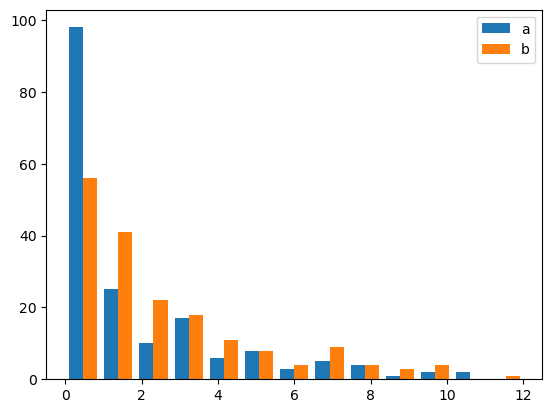

In [61]:
import matplotlib.pyplot as plt
#bins=np.arange(1,14)
plt.hist([fnum, tnum], bins=13, label=['a', 'b'])
plt.legend()

In [59]:
a=t1+t2+t3+t4+t6+t7+t22+t44+t66 # 0 1 2 3 5 6 8 10 12
res=set(a)
a=list(res)
print(len(a))
aa=len(a)
print(len(a)/num)

123
0.6795580110497238


In [60]:
a=f1+f2+f3+f4+f6+f7+f22+f44+f66 # 
res=set(a)
a=list(res)
print(len(a))
bb=len(a)
print((num-len(a))/num)

79
0.56353591160221


In [61]:
all_num=181*2
# FN:
FN=(181-aa)/all_num
print('FN',FN)
# FP:
FP=bb/all_num
print('FP',FP)
# TN:
TN=(181-bb)/all_num
print('TN',TN)
# TP:
TP=aa/all_num
print('TP',TP)

FN 0.16022099447513813
FP 0.21823204419889503
TN 0.281767955801105
TP 0.3397790055248619


In [62]:
Accuracy=TN+TP
print(Accuracy)
Precision=TP/(TP+FP)
print(Precision)
Recall=TP/(TP+FN)
print(Recall)
F1=2*TP/(2*TP+FP+FN)
print(F1)

0.6215469613259669
0.6089108910891089
0.6795580110497238
0.6422976501305483


### climate+0.9+1_1

In [2]:
with open('dataset.jsonl','w') as f:  
    with open('dataset_0.9_1.jsonl') as file:  
        for line in file:
            data = json.loads(line)
            q = data[0]['messages'][0]['content']
            claim = q.split('Claim:')[1].split('Reference:')[0]
            flag=False
            with open('dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    claim1 = q.split('Claim:')[1].split('Reference:')[0]
                    if claim1.strip()==claim.strip():
                        flag=True
                        break
            if flag==False:
                f.write(json.dumps(data)+"\n")

In [53]:
num=185

In [54]:
t=0
f=0
t1=[]
f1=[]
n=0
with open('climate+0.9/detections_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t1.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f1.append(ref1)
        if flag==False:
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t1.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f1.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t1.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f1.append(ref1)
        if flag==False:
            # \n\n开头
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # 
                    sentences1=ref1.strip().split('.')
                    sentences2=p1.strip()[:-1].split('.')
                    if sentences1[-3] == sentences2[-3]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t1.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f1.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

46 0.24864864864864866
164 0.8864864864864865
匹配到的总数目= 370


In [55]:
t=0
f=0
t11=[]
f11=[]
n=0
with open('climate+0.9/detections_1_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t11.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f11.append(ref1)
        if flag==False:
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t11.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f11.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t11.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f11.append(ref1)
        if flag==False:
            # \n\n开头
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # 
                    sentences1=ref1.strip().split('.')
                    sentences2=p1.strip()[:-1].split('.')
                    if sentences1[-3] == sentences2[-3]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t11.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f11.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

46 0.24864864864864866
156 0.8432432432432433
匹配到的总数目= 370


In [56]:
t=0
f=0
t2=[]
f2=[]
n=0
with open('climate+0.9/detections_2.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t2.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f2.append(ref1)
        if flag==False:
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t2.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f2.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t2.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f2.append(ref1)
        if flag==False:
            # \n\n开头
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # 
                    sentences1=ref1.strip().split('.')
                    sentences2=p1.strip()[:-1].split('.')
                    if sentences1[-3] == sentences2[-3]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t2.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f2.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

41 0.22162162162162163
140 0.7567567567567568
匹配到的总数目= 370


In [57]:
t=0
f=0
t22=[]
f22=[]
n=0
with open('climate+0.9/detections_2_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t22.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f22.append(ref1)
        if flag==False:
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t22.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f22.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t22.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f22.append(ref1)
        if flag==False:
            # \n\n开头
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # 
                    sentences1=ref1.strip().split('.')
                    sentences2=p1.strip()[:-1].split('.')
                    if sentences1[-3] == sentences2[-3]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t22.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f22.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

62 0.33513513513513515
151 0.8162162162162162
匹配到的总数目= 370


In [58]:
t=0
f=0
t3=[]
f3=[]
n=0
with open('climate+0.9/detections_3.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t3.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f3.append(ref1)
        if flag==False:
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t3.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f3.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t3.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f3.append(ref1)
        if flag==False:
            # \n\n开头
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # 
                    sentences1=ref1.strip().split('.')
                    sentences2=p1.strip()[:-1].split('.')
                    if sentences1[-3] == sentences2[-3]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t3.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f3.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

53 0.2864864864864865
141 0.7621621621621621
匹配到的总数目= 370


In [59]:
t=0
f=0
t33=[]
f33=[]
n=0
with open('climate+0.9/detections_3_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t33.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f33.append(ref1)
        if flag==False:
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t33.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f33.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t33.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f33.append(ref1)
        if flag==False:
            # \n\n开头
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # 
                    sentences1=ref1.strip().split('.')
                    sentences2=p1.strip()[:-1].split('.')
                    if sentences1[-3] == sentences2[-3]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t33.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f33.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

51 0.2756756756756757
146 0.7891891891891892
匹配到的总数目= 370


In [60]:
t=0
f=0
t4=[]
f4=[]
n=0
with open('climate+0.9/detections_4.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t4.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f4.append(ref1)
        if flag==False:
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t4.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f4.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t4.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f4.append(ref1)
        if flag==False:
            # \n\n开头
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # 
                    sentences1=ref1.strip().split('.')
                    sentences2=p1.strip()[:-1].split('.')
                    if sentences1[-3] == sentences2[-3]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t4.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f4.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

60 0.32432432432432434
151 0.8162162162162162
匹配到的总数目= 370


In [61]:
t=0
f=0
t44=[]
f44=[]
n=0
with open('climate+0.9/detections_4_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t44.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f44.append(ref1)
        if flag==False:
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t44.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f44.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t44.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f44.append(ref1)
        if flag==False:
            # \n\n开头
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # 
                    sentences1=ref1.strip().split('.')
                    sentences2=p1.strip()[:-1].split('.')
                    if sentences1[-3] == sentences2[-3]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t44.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f44.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

64 0.34594594594594597
147 0.7945945945945946
匹配到的总数目= 370


In [62]:
t=0
f=0
t5=[]
f5=[]
n=0
with open('climate+0.9/detections_5.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t5.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f5.append(ref1)
        if flag==False:
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t5.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f5.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t5.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f5.append(ref1)
        if flag==False:
            # \n\n开头
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # 
                    sentences1=ref1.strip().split('.')
                    sentences2=p1.strip()[:-1].split('.')
                    if sentences1[-3] == sentences2[-3]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t5.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f5.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

53 0.2864864864864865
145 0.7837837837837838
匹配到的总数目= 370


In [63]:
t=0
f=0
t55=[]
f55=[]
n=0
with open('climate+0.9/detections_5_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t55.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f55.append(ref1)
        if flag==False:
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t55.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f55.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t55.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f55.append(ref1)
        if flag==False:
            # \n\n开头
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # 
                    sentences1=ref1.strip().split('.')
                    sentences2=p1.strip()[:-1].split('.')
                    if sentences1[-3] == sentences2[-3]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t55.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f55.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

46 0.24864864864864866
155 0.8378378378378378
匹配到的总数目= 370


In [64]:
t=0
f=0
t6=[]
f6=[]
n=0
with open('climate+0.9/detections_6.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t6.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f6.append(ref1)
        if flag==False:
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t6.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f6.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t6.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f6.append(ref1)
        if flag==False:
            # \n\n开头
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # 
                    sentences1=ref1.strip().split('.')
                    sentences2=p1.strip()[:-1].split('.')
                    if sentences1[-3] == sentences2[-3]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t6.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f6.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

49 0.2648648648648649
134 0.7243243243243244
匹配到的总数目= 370


In [65]:
t=0
f=0
t66=[]
f66=[]
n=0
with open('climate+0.9/detections_6_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t66.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f66.append(ref1)
        if flag==False:
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t66.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f66.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t66.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f66.append(ref1)
        if flag==False:
            # \n\n开头
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # 
                    sentences1=ref1.strip().split('.')
                    sentences2=p1.strip()[:-1].split('.')
                    if sentences1[-3] == sentences2[-3]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t66.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f66.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

50 0.2702702702702703
142 0.7675675675675676
匹配到的总数目= 370


In [66]:
t=0
f=0
t7=[]
f7=[]
n=0
with open('climate+0.9/detections_7.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.9/dataset_0.9.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t7.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f7.append(ref1)
        if flag==False:
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t7.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f7.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t7.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f7.append(ref1)
        if flag==False:
            # \n\n开头
            with open('climate+0.9/dataset_0.9.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # 
                    sentences1=ref1.strip().split('.')
                    sentences2=p1.strip()[:-1].split('.')
                    if sentences1[-3] == sentences2[-3]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t7.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f7.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

31 0.16756756756756758
150 0.8108108108108109
匹配到的总数目= 370


In [67]:
tlist=[t1,t2,t3,t4,t5,t6,t7,t11,t22,t33,t44,t55,t66]
flist=[f1,f2,f3,f4,f5,f6,f7,f11,f22,f33,f44,f55,f66]

In [42]:
with open('climate+0.9/dataset_0.9.jsonl') as file1: 
    fnum=[]
    tnum=[]
    xnum=0
    for line1 in file1:
        data1 = json.loads(line1)
        q = data1[0]['messages'][0]['content']
        ref1 = q.split('Reference:')[-1]
        label=data1[0]['label']
        sub=ref1.strip().split('\"')
        xnum+=1
        if label == 'false': # non-halluciantion
            num1=0
            for f in flist:
                if ref1 in f:
                    num1+=1
            fnum.append(num1)
            #print(num,num1)
        else:
            num2=0
            for t in tlist:
                if ref1 in t:
                    num2+=1
            tnum.append(num2)
            #print(num,num2)
    print(xnum)
    print(np.mean(fnum))
    print(np.mean(tnum))

370
2.610810810810811
3.5243243243243243


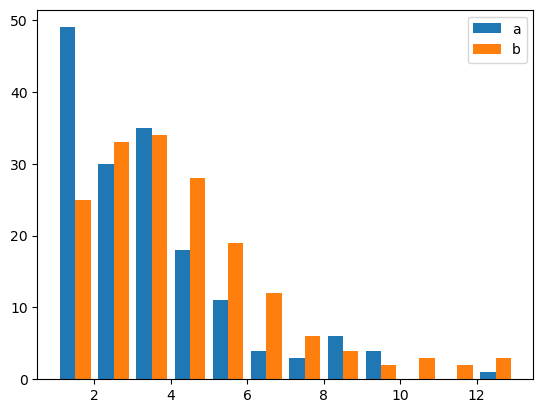

In [43]:
import matplotlib.pyplot as plt
bins=np.arange(1,14)
plt.hist([fnum, tnum], bins, label=['a', 'b'])
plt.legend()

In [37]:
minV=0
for kk in range(13-5):
    for jj in range(kk+1,13-4):
        for ii in range(jj+1,13-3):
            for i in range(ii+1,13-2):
                for j in range(i+1,13-1):
                     for k in range(j+1,13-0):
                        #for m in range(k+1,13-5):
                            #for n in range(m+1,13-4):
                                #for q in range(n+1,13-3):
                                    #for w in range(q+1,13-2):
                                        #for z in range(w+1,13-1):
                                            #for y in range(z+1,13-0):
                                                a=tlist[kk]+tlist[jj]+tlist[ii]+tlist[i]+tlist[j]+tlist[k]#+tlist[m]+tlist[n]+tlist[q]+tlist[w]+tlist[z]+tlist[y]+tlist[p] 
                                                a=list(set(a))
                                                aa=len(a)
                                                a=flist[kk]+flist[jj]+flist[ii]+flist[i]+flist[j]+flist[k]#+flist[m]+flist[n]+flist[q]+flist[w]+flist[z]+flist[y]+flist[p] 
                                                a=list(set(a))
                                                bb=len(a)
                                                TN=(num-bb)/(num*2)
                                                TP=aa/(num*2)
                                                FN=(num-aa)/(num*2)
                                                FP=bb/(num*2)
                                                F1=2*TP/(2*TP+FP+FN)
                                                if TN+TP>=minV:
                                                    print(kk)#,jj,ii,i,j,k,m,n,q,w,z,y,p)
                                                    print(TN+TP)
                                                    print(F1)
                                                    minV=TN+TP

0
0.5513513513513514
0.6359649122807017
0
0.5540540540540541
0.6357615894039734
0
0.5621621621621622
0.6367713004484306
0
0.5702702702702703
0.6474501108647449
0
0.5702702702702703
0.6535947712418301
0
0.5837837837837838
0.6547085201793722
0
0.5891891891891892
0.6607142857142857
0
0.6108108108108108
0.6742081447963802
0
0.6162162162162163
0.6830357142857142
0
0.6162162162162163
0.6885964912280702
0
0.6162162162162163
0.6743119266055044
0
0.6189189189189189
0.6845637583892618
0
0.6189189189189189
0.6817155756207675
0
0.6432432432432432
0.7066666666666667


In [33]:
a=t3+t4+t22+t33+t44+t1+t2+t5+t6+t7+t11+t55+t66 
res=set(a)
a=list(res)
print(len(a))
aa=len(a)
print(len(a)/num)

171
0.9243243243243243


In [34]:
a=f3+f4+f22+f33+f44+f1+f2+f5+f6+f7+f11+f55+f66
res=set(a)
a=list(res)
print(len(a))
bb=len(a)
print((num-len(a))/num)

161
0.12972972972972974


In [35]:
all_num=num*2
# FN:
FN=(num-aa)/all_num
print('FN',FN)
# FP:
FP=bb/all_num
print('FP',FP)
# TN:
TN=(num-bb)/all_num
print('TN',TN)
# TP:
TP=aa/all_num
print('TP',TP)

FN 0.03783783783783784
FP 0.43513513513513513
TN 0.06486486486486487
TP 0.46216216216216216


In [36]:
Accuracy=TN+TP
print(Accuracy)
Precision=TP/(TP+FP)
print(Precision)
Recall=TP/(TP+FN)
print(Recall)
F1=2*TP/(2*TP+FP+FN)
print(F1)

0.527027027027027
0.5150602409638555
0.9243243243243243
0.6615087040618954


### climate+0.5+1_1

In [2]:
num=169

In [16]:
t=0
f=0
t1=[]
f1=[]
n=0
with open('climate+0.5/detections_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.5/dataset_0.5.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t1.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f1.append(ref1)
        if flag==False:
            with open('climate+0.5/dataset_0.5.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t1.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f1.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t1.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f1.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

36 0.21301775147928995
149 0.8816568047337278
匹配到的总数目= 338


In [17]:
t=0
f=0
t11=[]
f11=[]
n=0
with open('climate+0.5/detections_1_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.5/dataset_0.5.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t11.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f11.append(ref1)
        if flag==False:
            with open('climate+0.5/dataset_0.5.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t11.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f11.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t11.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f11.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

35 0.20710059171597633
150 0.8875739644970414
匹配到的总数目= 338


In [18]:
t=0
f=0
t2=[]
f2=[]
n=0
with open('climate+0.5/detections_2.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.5/dataset_0.5.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t2.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f2.append(ref1)
        if flag==False:
            with open('climate+0.5/dataset_0.5.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t2.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f2.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t2.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f2.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

47 0.2781065088757396
129 0.7633136094674556
匹配到的总数目= 338


In [19]:
t=0
f=0
t22=[]
f22=[]
n=0
with open('climate+0.5/detections_2_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.5/dataset_0.5.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t22.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f22.append(ref1)
        if flag==False:
            with open('climate+0.5/dataset_0.5.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t22.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f22.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t22.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f22.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

35 0.20710059171597633
146 0.863905325443787
匹配到的总数目= 338


In [20]:
t=0
f=0
t3=[]
f3=[]
n=0
with open('climate+0.5/detections_3.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.5/dataset_0.5.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t3.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f3.append(ref1)
        if flag==False:
            with open('climate+0.5/dataset_0.5.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t3.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f3.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t3.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f3.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

36 0.21301775147928995
134 0.7928994082840237
匹配到的总数目= 338


In [21]:
t=0
f=0
t33=[]
f33=[]
n=0
with open('climate+0.5/detections_3_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.5/dataset_0.5.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t33.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f33.append(ref1)
        if flag==False:
            with open('climate+0.5/dataset_0.5.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t33.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f33.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t33.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f33.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

38 0.22485207100591717
143 0.8461538461538461
匹配到的总数目= 338


In [22]:
t=0
f=0
t4=[]
f4=[]
n=0
with open('climate+0.5/detections_4.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.5/dataset_0.5.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t4.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f4.append(ref1)
        if flag==False:
            with open('climate+0.5/dataset_0.5.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t4.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f4.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t4.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f4.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

32 0.1893491124260355
142 0.8402366863905325
匹配到的总数目= 338


In [23]:
t=0
f=0
t44=[]
f44=[]
n=0
with open('climate+0.5/detections_4_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.5/dataset_0.5.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t44.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f44.append(ref1)
        if flag==False:
            with open('climate+0.5/dataset_0.5.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t44.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f44.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t44.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f44.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

44 0.2603550295857988
146 0.863905325443787
匹配到的总数目= 338


In [24]:
t=0
f=0
t5=[]
f5=[]
n=0
with open('climate+0.5/detections_5.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.5/dataset_0.5.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t5.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f5.append(ref1)
        if flag==False:
            with open('climate+0.5/dataset_0.5.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t5.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f5.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t5.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f5.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

33 0.1952662721893491
144 0.8520710059171598
匹配到的总数目= 338


In [25]:
t=0
f=0
t55=[]
f55=[]
n=0
with open('climate+0.5/detections_5_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.5/dataset_0.5.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t55.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f55.append(ref1)
        if flag==False:
            with open('climate+0.5/dataset_0.5.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t55.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f55.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t55.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f55.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

37 0.21893491124260356
152 0.8994082840236687
匹配到的总数目= 338


In [26]:
t=0
f=0
t6=[]
f6=[]
n=0
with open('climate+0.5/detections_6.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.5/dataset_0.5.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t6.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f6.append(ref1)
        if flag==False:
            with open('climate+0.5/dataset_0.5.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t6.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f6.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t6.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f6.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

38 0.22485207100591717
132 0.7810650887573964
匹配到的总数目= 338


In [27]:
t=0
f=0
t66=[]
f66=[]
n=0
with open('climate+0.5/detections_6_1.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.5/dataset_0.5.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t66.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f66.append(ref1)
        if flag==False:
            with open('climate+0.5/dataset_0.5.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t66.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f66.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t66.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f66.append(ref1)
print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

40 0.23668639053254437
139 0.8224852071005917
匹配到的总数目= 338


In [28]:
t=0
f=0
t7=[]
f7=[]
n=0
with open('climate+0.5/detections_7.jsonl') as file:
    for line in file:
        data = json.loads(line)
        answer = data[1]['choices'][0]['message']['content']
        question = data[0]['messages'][0]['content']
        p1 = question.split('P1: \"')[1].split('P2: ')[0]
        flag = False
        with open('climate+0.5/dataset_0.5.jsonl') as file1:  
            for line1 in file1:
                data1 = json.loads(line1)
                q = data1[0]['messages'][0]['content']
                ref1 = q.split('Reference:')[-1]
                # 
                sentences1=ref1.strip().split('.')
                sentences2=p1.strip()[:-1].split('.')
                if sentences1[-2] == sentences2[-2]:
                    flag = True
                    n+=1
                    label=data1[0]['label']
                    if label == 'true': # halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            t+=1
                        else:
                            t7.append(ref1)
                    else:# non-halluciantion
                        if "here are no conflicting parts" in answer: # factual
                            f+=1
                        else:
                            f7.append(ref1)
        if flag==False:
            with open('climate+0.5/dataset_0.5.jsonl') as file1:  
                for line1 in file1:
                    data1 = json.loads(line1)
                    q = data1[0]['messages'][0]['content']
                    ref1 = q.split('Reference:')[-1]
                    # \"and",or\uxxxxcode
                    if ref1.strip().split(',')[-1] == p1.strip()[:-1].split(',')[-1] or ref1.strip().split('\"')[-1] == p1.strip()[:-1].split('\"')[-1]:
                        flag = True
                        n+=1
                        label=data1[0]['label']
                        if label == 'true': # halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                t+=1
                            else:
                                t7.append(ref1)
                        else:# non-halluciantion
                            if "here are no conflicting parts" in answer: # factual
                                f+=1
                            else:
                                f7.append(ref1)
                    if flag==False:
                        uni=p1.strip()[:-1].split('\\u')[-1][4:]
                        length=len(uni)
                        if ref1.strip()[-length:] == uni:
                            flag = True
                            n+=1
                            label=data1[0]['label']
                            if label == 'true': # halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    t+=1
                                else:
                                    t7.append(ref1)
                            else:# non-halluciantion
                                if "here are no conflicting parts" in answer: # factual
                                    f+=1
                                else:
                                    f7.append(ref1)

print(num-t,(num-t)/num)
print(f,f/num)
print('匹配到的总数目=',n)

27 0.15976331360946747
160 0.9467455621301775
匹配到的总数目= 338


In [80]:
tlist=[t1,t2,t3,t4,t5,t6,t7,t11,t22,t33,t44,t55,t66]
flist=[f1,f2,f3,f4,f5,f6,f7,f11,f22,f33,f44,f55,f66]
#      0   1  2  3  4  5  6  7   8   9   10  11  12
minV=0
for kk in range(13-11):
    for jj in range(kk+1,13-10):
        for ii in range(jj+1,13-9):
            for i in range(ii+1,13-8):
                for j in range(i+1,13-7):
                     for k in range(j+1,13-6):
                        for m in range(k+1,13-5):
                            for n in range(m+1,13-4):
                                for q in range(n+1,13-3):
                                    for w in range(q+1,13-2):
                                        for z in range(w+1,13-1):
                                            for y in range(z+1,13-0):
                                                a=tlist[kk]+tlist[jj]+tlist[ii]+tlist[i]+tlist[j]+tlist[k]+tlist[m]+tlist[n]+tlist[q]+tlist[w]+tlist[z]+tlist[y]#+tlist[p] 
                                                a=list(set(a))
                                                aa=len(a)
                                                a=flist[kk]+flist[jj]+flist[ii]+flist[i]+flist[j]+flist[k]+flist[m]+flist[n]+flist[q]+flist[w]+flist[z]+flist[y]#+flist[p] 
                                                a=list(set(a))
                                                bb=len(a)
                                                TN=(num-bb)/(num*2)
                                                TP=aa/(num*2)
                                                FN=(num-aa)/(num*2)
                                                FP=bb/(num*2)
                                                F1=2*TP/(2*TP+FP+FN)
                                                if TN+TP>=minV:
                                                    print(kk,jj,ii,i)#,j,k,m,n,q,w,z,y,p)
                                                    print(TN+TP)
                                                    print(F1)
                                                    minV=TN+TP

0 1 2 3
0.5405405405405406
0.6653543307086615
0 1 2 3
0.5432432432432432
0.6679764243614931


In [29]:
tlist=[t1,t2,t3,t4,t5,t6,t7,t11,t22,t33,t44,t55,t66]
flist=[f1,f2,f3,f4,f5,f6,f7,f11,f22,f33,f44,f55,f66]
with open('climate+0.5/dataset_0.5.jsonl') as file1: 
    fnum=[]
    tnum=[]
    xnum=0
    for line1 in file1:
        data1 = json.loads(line1)
        q = data1[0]['messages'][0]['content']
        ref1 = q.split('Reference:')[-1]
        label=data1[0]['label']
        sub=ref1.strip().split('\"')
        xnum+=1
        if label == 'false': # non-halluciantion
            num1=0
            for f in flist:
                if ref1 in f:
                    num1+=1
            fnum.append(num1)
            #print(num,num1)
        else:
            num2=0
            for t in tlist:
                if ref1 in t:
                    num2+=1
            tnum.append(num2)
            #print(num,num2)
    print(xnum)
    print(np.mean(fnum))
    print(np.mean(tnum))

338
1.9585798816568047
2.828402366863905


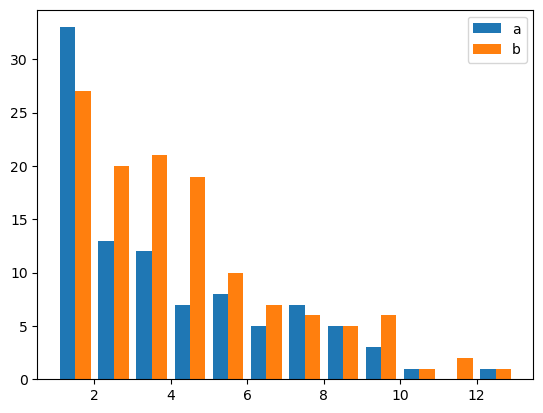

In [26]:
import matplotlib.pyplot as plt
bins=np.arange(1,14)
plt.hist([fnum, tnum], bins, label=['a', 'b'])
plt.legend()

In [49]:
a=t1+t2+t3+t4+t5+t6+t7+t11+t22+t33+t44+t55+t66 # 
res=set(a)
a=list(res)
print(len(a))
aa=len(a)
print(len(a)/num)

125
0.7396449704142012


In [50]:
a=f1+f2+f3+f4+f5+f6+f7+f11+f22+f33+f44+f55+f66 # 
res=set(a)
a=list(res)
print(len(a))
bb=len(a)
print((num-len(a))/num)

95
0.4378698224852071


In [51]:
all_num=num*2
# FN:
FN=(num-aa)/all_num
print('FN',FN)
# FP:
FP=bb/all_num
print('FP',FP)
# TN:
TN=(num-bb)/all_num
print('TN',TN)
# TP:
TP=aa/all_num
print('TP',TP)

FN 0.1301775147928994
FP 0.28106508875739644
TN 0.21893491124260356
TP 0.3698224852071006


In [52]:
Accuracy=TN+TP
print(Accuracy)
Precision=TP/(TP+FP)
print(Precision)
Recall=TP/(TP+FN)
print(Recall)
F1=2*TP/(2*TP+FP+FN)
print(F1)

0.5887573964497042
0.5681818181818182
0.7396449704142012
0.6426735218508998
